In [28]:
import numpy as np
from matplotlib import pyplot as plt, cm

In [69]:
t_stat = -np.loadtxt('../results/combined/t_stat.csv', delimiter=',')
masked_t_stat = np.ma.array(t_stat, mask=np.identity(n=len(t_stat)))

t_value = 2.306

C:\Users\saksh\AppData\Local\Temp\ipykernel_21512\1342987394.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdBu')


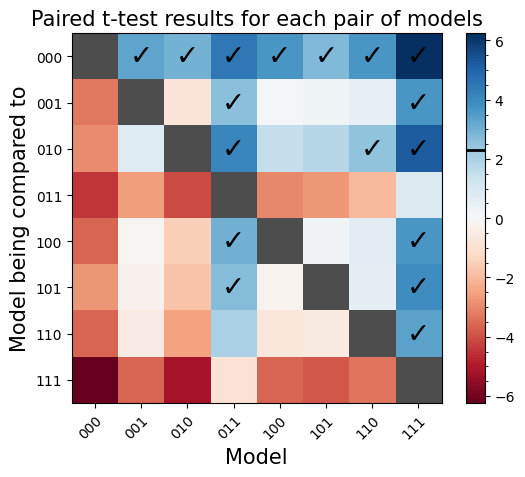

In [84]:
labels = ['000', '001', '010', '011', '100', '101', '110', '111']

fig, ax = plt.subplots()

cmap = cm.get_cmap('RdBu')
cmap.set_bad('k',.7)

graph = ax.imshow(masked_t_stat, cmap=cmap)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels=labels)
ax.set_yticklabels(labels=labels)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

cbar = fig.colorbar(graph)
cbar.minorticks_on()
cbar.ax.hlines(t_value, -2, 2, colors = 'k', linewidth = 2)

ax.set_xlabel("Model", fontsize=15)
ax.set_ylabel("Model being compared to", fontsize=15)

for i in range(len(t_stat)):
    for j in range(len(t_stat)):
        if t_stat[i][j] > t_value:
            text = ax.text(j, i, "✓",
                        ha="center", va="center", color="k", fontsize=20)
            
plt.title("Paired t-test results for each pair of models", fontsize=15)
plt.show()